First 5 rows:
     AGE  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI CLASS
0  50.0    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
1  26.0    4.9   3.7  1.4  1.1  2.1   0.6  23.0     N
2  50.0    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
3  50.0    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
4  33.0    4.9   4.9  1.0  0.8  2.0   0.4  21.0     N

Last 5 rows:
        AGE  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI CLASS
1004  55.0    6.8   5.3  2.0  1.0  3.5   0.9  30.1    Y 
1005  55.0    NaN   5.7  4.0  0.9  3.3   1.8  30.0    Y 
1006  62.0    6.7   5.3  2.0  1.0  3.5   NaN  30.1    Y 
1007  57.0    9.3   5.3  3.3  1.0  1.4   1.3  29.0    Y 
1008  55.0   13.9   5.4  1.6  1.6  3.1   0.7  33.0    Y 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     1008 non-null   float64
 1   HbA1c   1006 non-null   float64
 2   Chol    1007 non-null   float64
 3   T

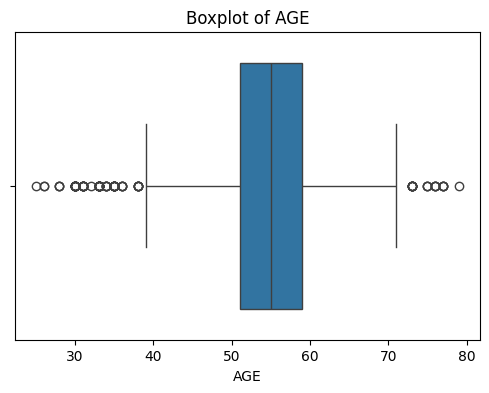

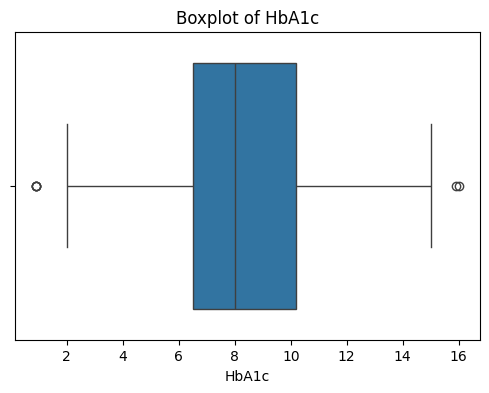

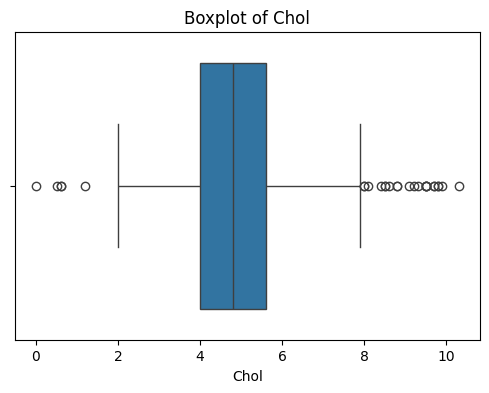

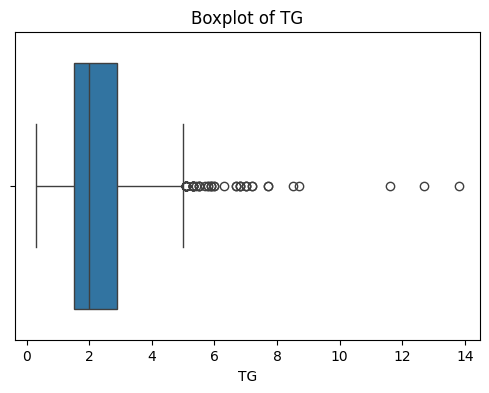

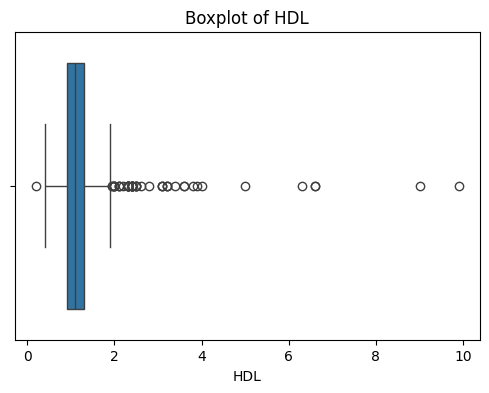

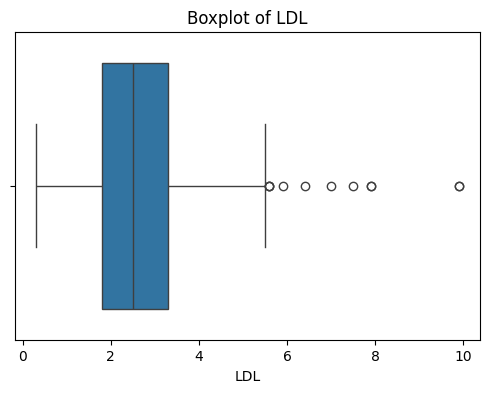

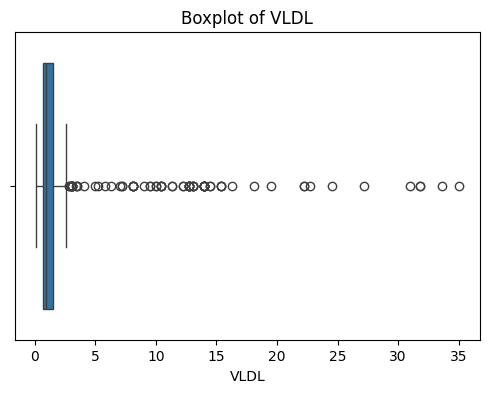

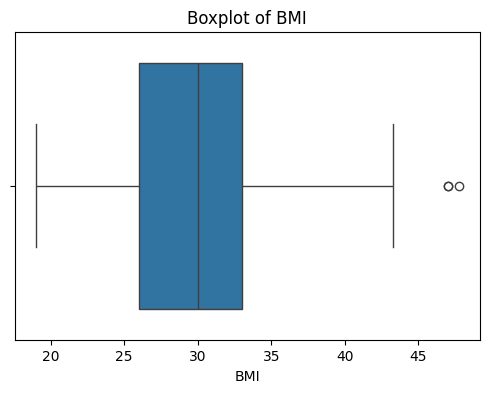


Missing values after imputation:
AGE      0
HbA1c    0
Chol     0
TG       0
HDL      0
LDL      0
VLDL     0
BMI      0
CLASS    0
dtype: int64
Unique CLASS values: ['N' 'P' 'Y']


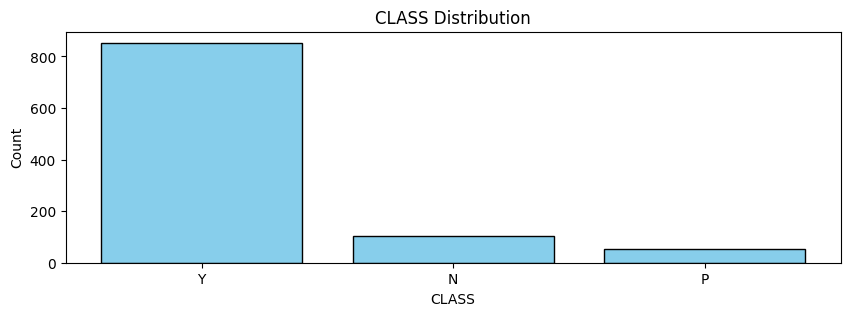

CLASS counts:
 CLASS
Y    853
N    103
P     53
Name: count, dtype: int64


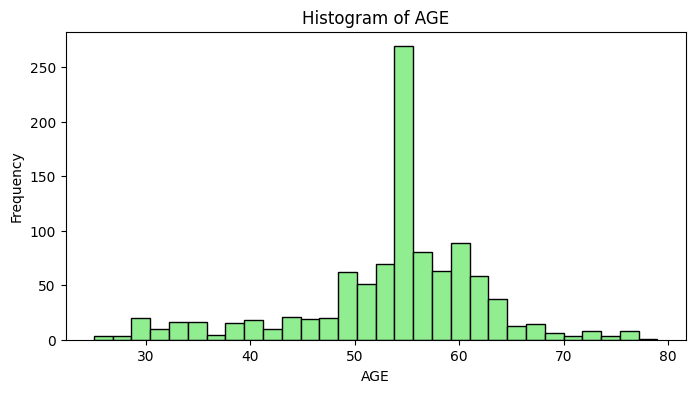

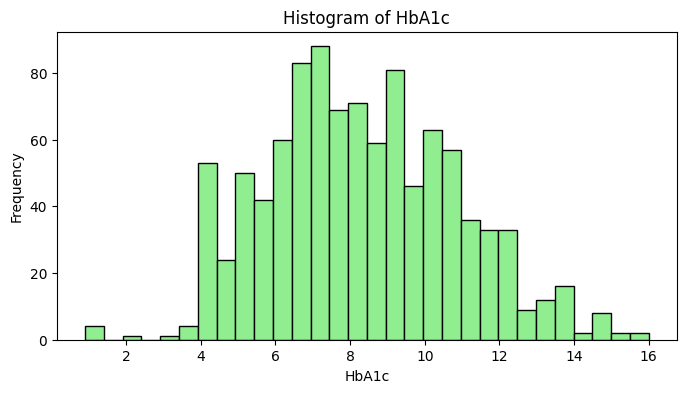

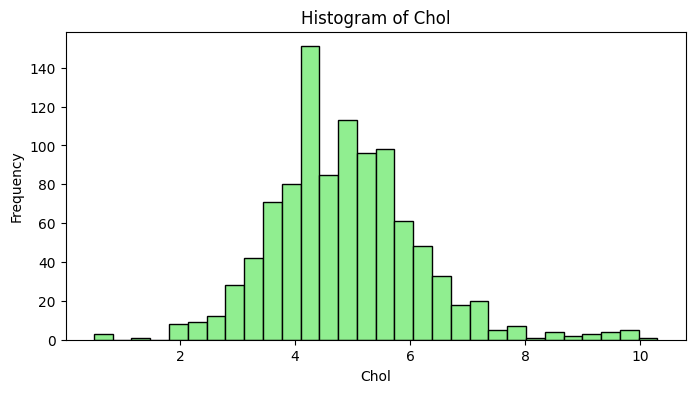

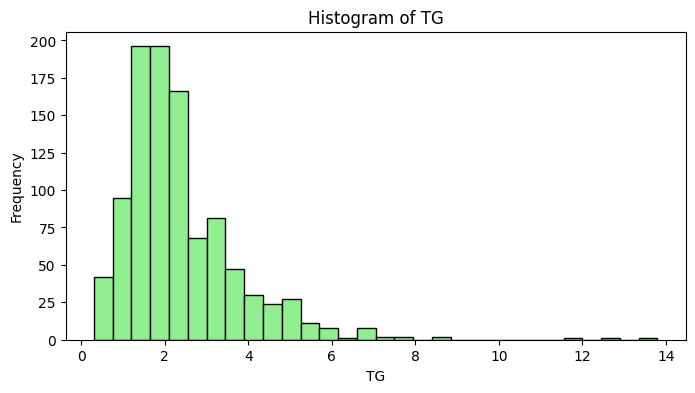

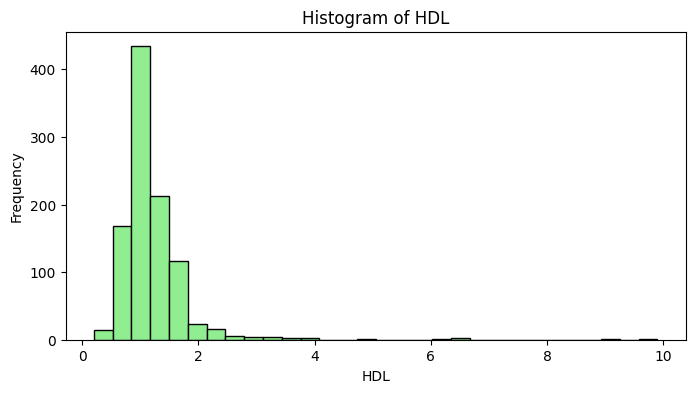

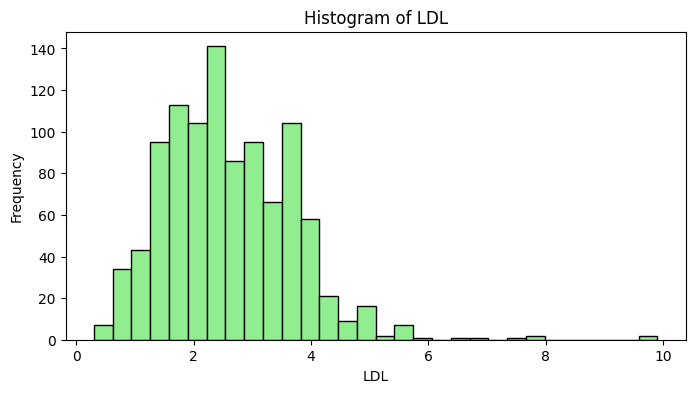

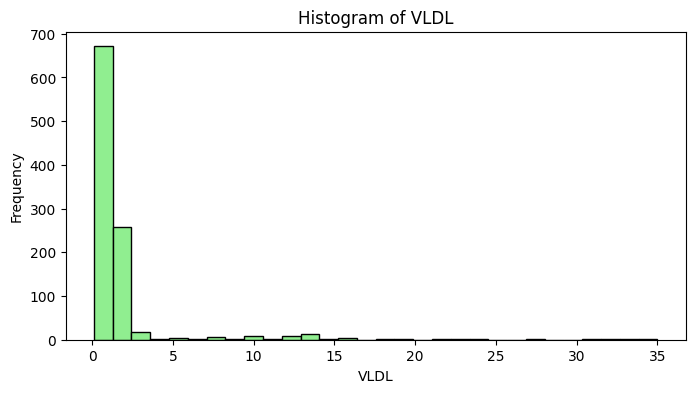

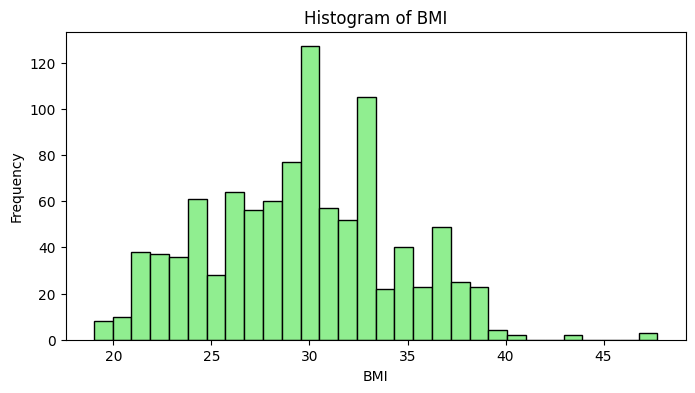

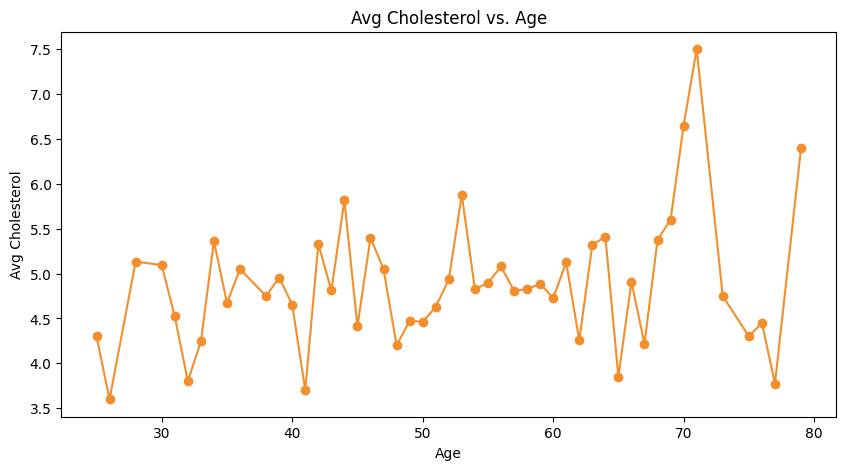

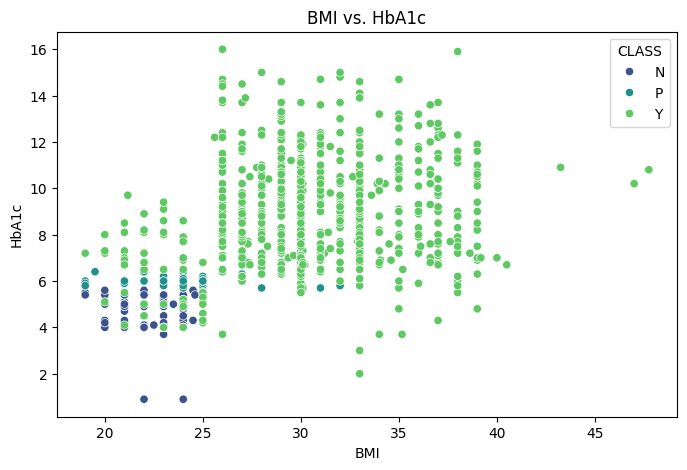

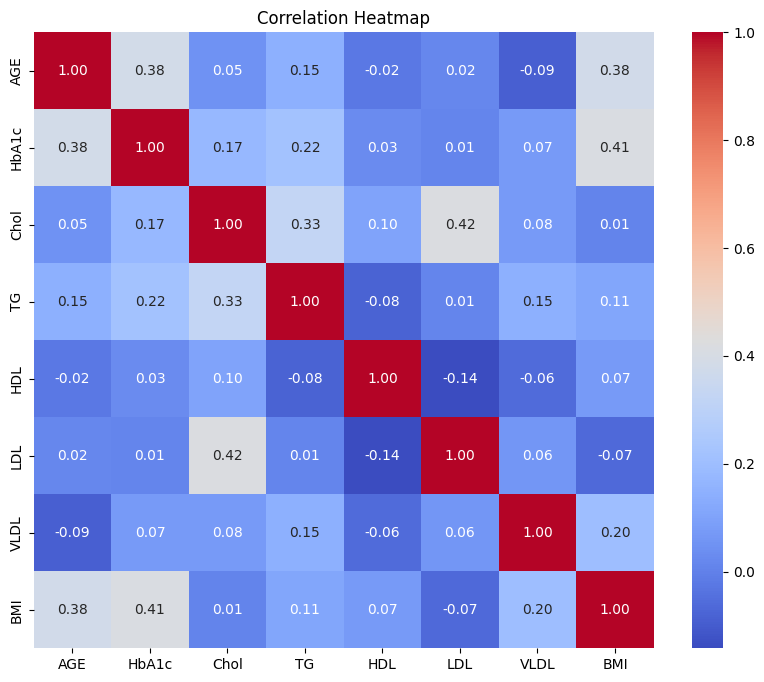

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

warnings.filterwarnings('ignore')


df = pd.read_csv('diabetes_unclean.csv')

# We don't need these columns hence we drop them
df.drop(labels=['ID', 'No_Pation', 'Gender', 'Urea', 'Cr'], axis=1, inplace=True)

print("First 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())
print("\nInfo:")
df.info()
print("\nDescription:\n", df.describe())

# All outliers in this list are true outliers hence we keep them as it is
num_cols = ['AGE', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
for var in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()

#0 cannot be a value for these columns, hence we replace them with the median
meas = ['HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
for var in meas:
    if var in df.columns:
        df[var] = df[var].replace(0, np.nan)
        df[var] = df[var].fillna(df[var].median())


if 'AGE' in df.columns:
    df['AGE'] = df['AGE'].fillna(df['AGE'].median())

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Class contains duplicates like 'y' and 'Y' hence we make a common value for all
if 'CLASS' in df.columns:
    df['CLASS'] = df['CLASS'].astype(str).str.strip().str.upper()
    print("Unique CLASS values:", df['CLASS'].unique())


def bar_plot(var):
    cnt = df[var].value_counts()
    plt.figure(figsize=(10, 3))
    plt.bar(cnt.index.astype(str), cnt.values, color='skyblue', edgecolor='black')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'{var} Distribution')
    plt.show()
    print(f"{var} counts:\n", cnt)

if 'CLASS' in df.columns:
    bar_plot('CLASS')


def hist_plot(var):
    plt.figure(figsize=(8, 4))
    plt.hist(df[var].dropna(), bins=30, color='lightgreen', edgecolor='black')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {var}')
    plt.show()

for var in num_cols:
    hist_plot(var)


if 'AGE' in df.columns and 'Chol' in df.columns:
    age_chol = df.groupby('AGE')['Chol'].mean().reset_index()
    plt.figure(figsize=(10, 5))
    plt.plot(age_chol['AGE'], age_chol['Chol'], marker='o', linestyle='-', color='#f28e2b')
    plt.xlabel('Age')
    plt.ylabel('Avg Cholesterol')
    plt.title('Avg Cholesterol vs. Age')
    plt.show()


if all(x in df.columns for x in ['BMI', 'HbA1c']):
    plt.figure(figsize=(8, 5))
    if 'CLASS' in df.columns:
        sns.scatterplot(data=df, x='BMI', y='HbA1c', hue='CLASS', palette="viridis")
    plt.xlabel('BMI')
    plt.ylabel('HbA1c')
    plt.title('BMI vs. HbA1c')
    plt.show()


plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
